# Preface

This tabular DataSet consists of listings of all the movies and tv shows available on Netflix, along with details such as
<ul>
    <li>Type</li>
    <li>Title</li>
    <li>Director</li> 
    <li>Cast</li> 
    <li>Country</li>
    <li>Release_year</li>
    <li>Genres</li>
</ul>

The attributes or features of the DataSet are

<ul>
    <li>Type: Whether the content is a Movie or TV Show</li>
    <li>Title: Title of the Movie / TV Show</li>
    <li>Director: Director of the Movie. There can be multiple directors also.</li>
    <li>Cast: Actors involved in the movie/show</li>
    <li>Country: The country where the movie/show was produced</li>
    <li>Release_year: Actual Release year of the movie or tv show</li>
    <li>Genres: Genre or Genres of the content (there can be multiple genres as well say the movie Avengers is Sci-Fi but it is Action and Adventure too)</li>
</ul>

---
## Index

<ol>
    <li>Importing the Dataset</li>
    <li>Data Analysis
        <ul>
            <li>Exploratory Data Analysis</li>
            <li>Data Visualization</li>
            <li>Recommendations</li>
        </ul>
    </li>
    <li>Problem statements</li>
    <ol>
        <li>Which are the top 5 directors who produce most of the movies only?</li>
        <li>Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix?</li>
        <li>Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]</li>
        <li>Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform?</li>
        <li>Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]</li>
    <ol>
</ol>

---
### 1. Importing the dataset in CSV Format 'asbl_data_analyst_interview_assignment_netflix_csv.csv'

In [176]:
# importing pandas library
import pandas as pd

In [177]:
# importing the dataset
df_netflix = pd.read_csv('asbl_data_analyst_interview_assignment_netflix_csv.csv', encoding = 'latin')

---
### 2. Exploratory Data Analysis

In [178]:
# importing the matplotlib library
import matplotlib.pyplot as plt

#importing the seaborn library
#import seaborn as sns

#importing the numpy library
import numpy as np

In [179]:
# printing the informaiton about the dataset
print("Information about the dataset: \n")
df_netflix.info()

Information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         8807 non-null   int64 
 1   Type          8807 non-null   object
 2   Title         8807 non-null   object
 3   Director      6173 non-null   object
 4   Cast          7982 non-null   object
 5   Country       7976 non-null   object
 6   Release_year  8807 non-null   int64 
 7   Genres        8807 non-null   object
dtypes: int64(2), object(6)
memory usage: 550.6+ KB


In [180]:
# printing the shape of data
print("Shape of data: Rows x Columns \n", df_netflix.shape)

Shape of data: Rows x Columns 
 (8807, 8)


In [181]:
# displaying the top 5 rows in the dataset
df_netflix.head()

,Index,Type,Title,Director,Cast,Country,Release_year,Genres
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


In [182]:
# checking for Null values in the dataset
df_netflix.isnull().sum()

Index              0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64

---
#### 2.a. Analysing Countries and determining emerging markets

In [183]:
# analysing presence of Netflix in different countries
df_countries = df_netflix[['Country']].copy()

# displaying the dataframe
df_countries

,Country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [184]:
# dropping the Null value Rows from the dataframe
df_countries.dropna

# displaying the count of each country
df_countries.Country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: Country, Length: 748, dtype: int64

In [185]:
# splitting the Country column on ',' delimeter as there are multiple values in some cells
# splitting the values in the 'Country' column on ',' then creating a new row for each value, and assigning the resulting dataframe back to the df variable. 
# then reset_index(drop=True) call is used for resetting the row index after the splitting
df_c = df_countries.assign(Country = df_countries.Country.str.split(',')).explode('Country').reset_index(drop = True)

# removing the leading spaces introduced during splitting the columns
df_c['Country'] = df_c['Country'].str.lstrip()

# displaying the value counts of each country
#df_c.shape
df_c.value_counts()

Country       
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Jamaica              1
Slovakia             1
Nicaragua            1
Ethiopia             1
Liechtenstein        1
Length: 123, dtype: int64

Text(0, 0.5, 'Count')

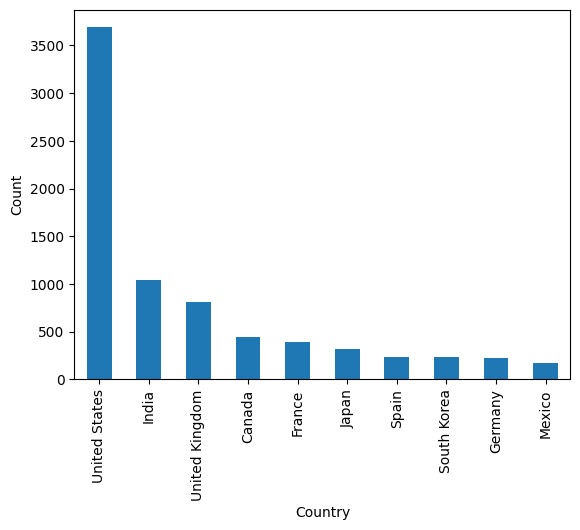

In [186]:
# plotting a barplot with top 10 occuring countries
df_c.Country.value_counts().sort_values(ascending=0)[:10].plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Count')
#df_c.shape

<h4>In the above Bar Plot we can see that United States is the most popular country in terms of Movies and TV Shows and <br><br>
<i>1. India</i><br>
<i>2. United Kingdom</i><br>
<i>3. Canada</i><br> 
<i>4. France</i><br><br> are the top 4 emerging markets for producing Movies and TV Shows</h4>

---
#### 2.b. Analysing Genres and determining the most viewed genres across countries

In [187]:
# analysing different Genres on Netflix
df_genre = df_netflix[['Genres']].copy()

# displaying the dataframe
df_genre

,Genres
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [188]:
# dropping the Null value Rows from the dataframe
df_genre.dropna

# displaying the count of each country
df_genre.Genres.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: Genres, Length: 514, dtype: int64

In [189]:
# splitting the Genre column on ',' delimeter as there are multiple values in some cells
# splitting the values in the 'Genre' column by ',' then creating a new row for each value, and assigning the resulting dataframe back to the df variable. 
# then reset_index(drop=True) call is used for resetting the row index after the explosion
df_g = df_genre.assign(Genres = df_genre.Genres.str.split(',')).explode('Genres').reset_index(drop = True)

# removing the leading spaces introduced during splitting the columns
df_g['Genres'] = df_g['Genres'].str.lstrip()

# displaying the value counts of each genre
#df_g.shape
df_g.value_counts()

Genres                      
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV

Text(0, 0.5, 'Count')

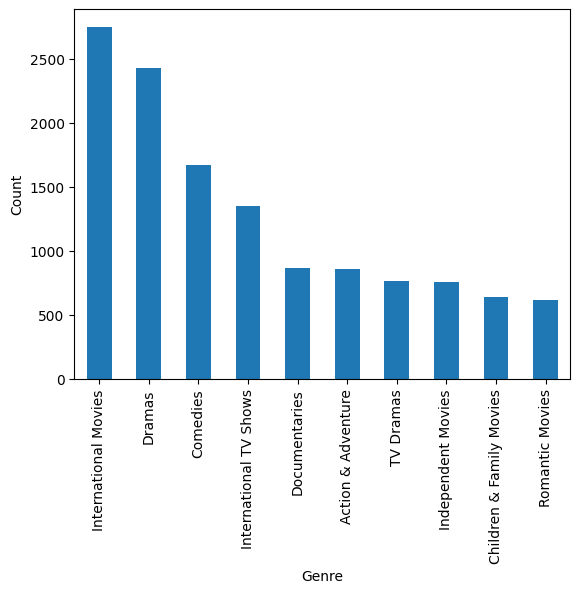

In [191]:
# plotting a barplot with top 10 occuring genres
df_g.Genres.value_counts().sort_values(ascending=0)[:10].plot(kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Count')
#df_g.shape

<h4>In the above Bar Plot we can see that<br><br>
    <i>1. International Movies</i><br>
    <i>2. Dramas</i><br>
    <i>3. Comedies</i><br>
    <i>4. International TV Shows</i><br><br>
    Are the top 4 most viewed Genres across all countries<br><br>
    So, more content should be made and released in these Genres
</h4>

---
#### 2.c. Analysing the Type of content made across countries

Text(0, 0.5, 'Type')

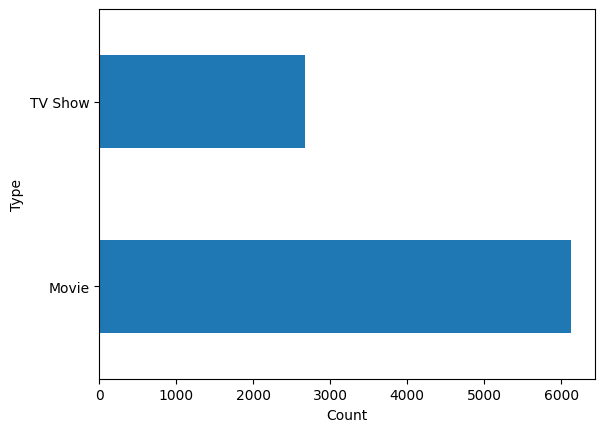

In [192]:
# comparing the total number of TV Shows and total number of Movies
df_netflix.Type.value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Type')

<h4>Movies are made more than TV Shows across countries, it shows that movies are more preferred entertainment medium than TV Shows<br><br>
So, more movies in popular genres should be made and released</h4>

---
### 4. Problems
### a. Which are the top 5 directors who produce most of the movies only?

In [193]:
# importing the csv file with only the required columns 'Type' & 'Director'
directors_df = pd.read_csv('asbl_data_analyst_interview_assignment_netflix_csv.csv', usecols = ['Type', 'Director'], encoding = 'latin')

In [194]:
# importing the zip_longest function from the itertools module. 
# the zip_longest function allows combining two or more iterables, filling in any missing values with a specified value.
from itertools import zip_longest

# setting the index of a DataFrame directors to the column named 'Type', and then applies a lambda function to split each value in the DataFrame by the ',' character. 
# The result is stored in a new DataFrame called temp_df.
temp_df = directors_df.set_index('Type').apply(lambda x: x.str.split(','))

# replacing any null values in the tmp DataFrame with an empty string ''.
result_directors = (temp_df.where(temp_df.notnull(), '')
          
          # applying a lambda function to each row of the tmp DataFrame. 
          # The lambda function uses the zip_longest function to combine the values in each row into tuples. 
          # The resulting tuples are then converted to a list.
          .apply(lambda x: list(zip_longest(*x)), axis = 1)
          
          # exploding each list in the DataFrame into separate rows, duplicating the other values in the row as necessary.
          .explode()
          
          # converting each tuple in the DataFrame to a separate Series object.
          .apply(pd.Series)
          
          # setting the column names of the DataFrame to the original column names of the tmp DataFrame.
          .set_axis(temp_df.columns, axis = 1)
          
          # resetting the index of the DataFrame, adding a new column named 'index' to store the original index values of the tmp DataFrame.
          ).reset_index()

# printing the result for debugging
#print(result)

In [195]:
# dropping all the rows that are TV Show
directors_count = result_directors[result_directors['Type'] != 'TV Show'].copy()

# dropping the Type column
directors_count.drop(['Type'], axis = 1)

# removing the leading spaces introduced during splitting the column
directors_count['Director'] = directors_count['Director'].str.lstrip()

In [196]:
# displaying the head with 10 rows
directors_count.head(10)

,Type,Director
0,Movie,Kirsten Johnson
6,Movie,Robert Cullen
7,Movie,José Luis Ucha
8,Movie,Haile Gerima
10,Movie,Theodore Melfi
13,Movie,Christian Schwochow
14,Movie,Bruno Garotti
17,Movie,Pedro de Echave García
18,Movie,Pablo Azorín Williams
20,Movie,Adam Salky


In [197]:
# counting the movies with same director
directors_count['Director'].value_counts()

Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Marcus Raboy         15
                     ..
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Paul Demeyer          1
Mozez Singh           1
Name: Director, Length: 4777, dtype: int64

Text(0.5, 0, 'Director')

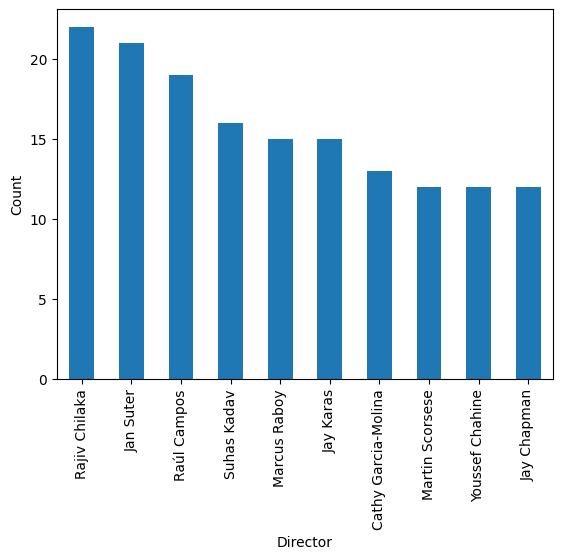

In [198]:
# plotting the top 10 occuring directors
directors_count.Director.value_counts().sort_values(ascending=0)[:10].plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Director')

#### The top 5 Directors are:
Rank|Director Name|Movies Count|
|-----------|-----------|-----------|
|1|Rajiv Chilaka|22|
|2|Jan Suter|21|
|3|Raúl Campos|19|
|4|Suhas Kadav|16|
|5|Marcus Raboy|15|

---
### b. Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

In [199]:
# importing the csv file with only the required columns 'Type', 'Genres'
genres_df = pd.read_csv('asbl_data_analyst_interview_assignment_netflix_csv.csv', usecols = ['Type', 'Genres'], encoding = 'latin')

In [200]:
# setting the index of a DataFrame directors to the column named 'Type', and then applies a lambda function to split each value in the DataFrame by the ',' character. 
# The result is stored in a new DataFrame called tmp.
temp_df = genres_df.set_index('Type').apply(lambda x: x.str.split(','))

# replacing any null values in the tmp DataFrame with an empty string ''.
result_genre = (temp_df.where(temp_df.notnull(), '')
            
          # applying a lambda function to each row of the tmp DataFrame. 
          # The lambda function uses the zip_longest function to combine the values in each row into tuples. 
          # The resulting tuples are then converted to a list.
          .apply(lambda x: list(zip_longest(*x)), axis = 1)
                
          # exploding each list in the DataFrame into separate rows, duplicating the other values in the row as necessary.
          .explode()
                
          # converting each tuple in the DataFrame to a separate Series object.
          .apply(pd.Series)
          
          # setting the column names of the DataFrame to the original column names of the tmp DataFrame.
          .set_axis(temp_df.columns, axis=1)
        
          # resetting the index of the DataFrame, adding a new column named 'index' to store the original index values of the tmp DataFrame.
          ).reset_index()

# printing the result for debugging
#print(result)

In [201]:
# dropping the Type column
result_genre.drop(['Type'], axis = 1)

# removing the leading spaces introduced while splitting the columns
result_genre['Genres'] = result_genre['Genres'].str.lstrip()

In [202]:
# counting the most popular Genres
result_genre['Genres'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

Text(0.5, 0, 'Genre')

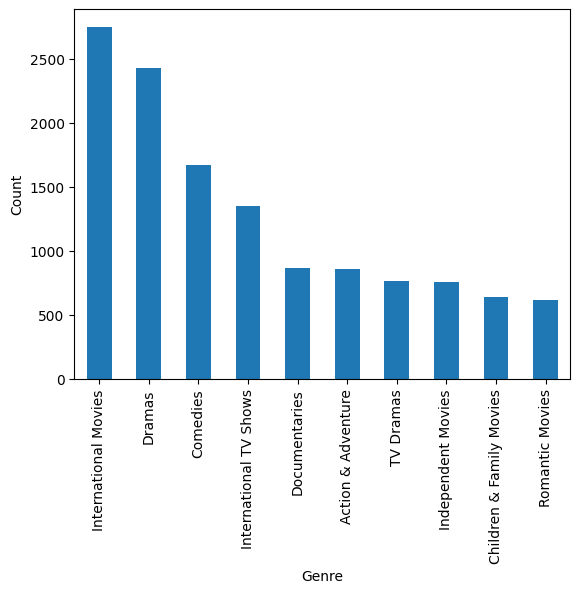

In [203]:
# plotting the top 10 Genres
result_genre.Genres.value_counts().sort_values(ascending=0)[:10].plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Genre')

#### The top 5 Genres are liked by people:

Rank|Genre|Movies Count|
|-----------|-----------|-----------|
|1|International Movies|2752|
|2|Dramas|2427|
|3|Comedies|1674|
|4|International TV Shows|1351|
|5|Documentaries|869|

---
### c. Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

In [204]:
# importing the csv file with only the required columns 'Type', 'Director', 'Release_year'
collaborate_df = pd.read_csv('asbl_data_analyst_interview_assignment_netflix_csv.csv', usecols = ['Type', 'Director', 'Release_year'], encoding = 'latin')

In [205]:
# setting the index of a DataFrame directors to the column named 'Release_year', and then applies a lambda function to split each value in the DataFrame by the , character. 
# The result is stored in a new DataFrame called tmp.
temp_df = collaborate_df.set_index('Release_year').apply(lambda x: x.str.split(','))

# replacing any null values in the tmp DataFrame with an empty string ''.
result_collaboration = (temp_df.where(temp_df.notnull(), '')
          
          # applying a lambda function to each row of the tmp DataFrame. 
          # The lambda function uses the zip_longest function to combine the values in each row into tuples. 
          # The resulting tuples are then converted to a list.
          .apply(lambda x: list(zip_longest(*x)), axis = 1)
          
          # exploding each list in the DataFrame into separate rows, duplicating the other values in the row as necessary.
          .explode()
          
          # converting each tuple in the DataFrame to a separate Series object.
          .apply(pd.Series)
          
          # setting the column names of the DataFrame to the original column names of the tmp DataFrame.
          .set_axis(temp_df.columns, axis = 1)
          
          # resetting the index of the DataFrame, adding a new column named 'index' to store the original index values of the tmp DataFrame.
          ).reset_index()

# printing the result for debugging
print(result_collaboration)

      Release_year     Type         Director
0             2020    Movie  Kirsten Johnson
1             2021  TV Show             None
2             2021  TV Show  Julien Leclercq
3             2021  TV Show             None
4             2021  TV Show             None
...            ...      ...              ...
9607          2007    Movie    David Fincher
9608          2018  TV Show             None
9609          2009    Movie  Ruben Fleischer
9610          2006    Movie     Peter Hewitt
9611          2015    Movie      Mozez Singh

[9612 rows x 3 columns]


In [206]:
# cleaning the data by dropping the Rows that do not have any Director's name and resetting the index
clean_result = result_collaboration.dropna().reset_index() 

# removing the leading spaces introduced while splitting the columns
clean_result['Director'] = clean_result['Director'].str.lstrip()

# printing the new clean_result dataframe
clean_result

,index,Release_year,Type,Director
0,0,2020,Movie,Kirsten Johnson
1,2,2021,TV Show,Julien Leclercq
2,5,2021,TV Show,Mike Flanagan
3,6,2021,Movie,Robert Cullen
4,8,1993,Movie,Haile Gerima
...,...,...,...,...
6168,9606,2015,Movie,Majid Al Ansari
6169,9607,2007,Movie,David Fincher
6170,9609,2009,Movie,Ruben Fleischer
6171,9610,2006,Movie,Peter Hewitt


In [207]:
# only considering the movies that are released after 2010 for finding the popular directors
clean_result_final = clean_result[clean_result['Release_year'] > 2010]

In [208]:
# printing the final cleaned dataframe
clean_result_final

,index,Release_year,Type,Director
0,0,2020,Movie,Kirsten Johnson
1,2,2021,TV Show,Julien Leclercq
2,5,2021,TV Show,Mike Flanagan
3,6,2021,Movie,Robert Cullen
5,9,2021,TV Show,Andy Devonshire
...,...,...,...,...
6162,9596,2011,Movie,Jason Reitman
6165,9599,2016,Movie,Mohamed Diab
6166,9603,2014,Movie,Chandra Prakash Dwivedi
6168,9606,2015,Movie,Majid Al Ansari


In [209]:
# filtering the DataFrame to only include Movies or TV shows
recent_movies = clean_result_final[(clean_result_final["Type"] == "Movie") | (clean_result_final["Type"] == "TV Show")]

# grouping the recent movies by director and count the number of occurences for each director
director_counts = recent_movies.groupby("Director").size()

# sorting the directors by the occurences in descending order
sorted_directors = director_counts.sort_values(ascending = False)

# printing the top two directors
print("The top two Movie directors to collaborate more with are: ")
print(sorted_directors.head(2).index.tolist())

The top two Movie directors to collaborate more with are: 
['Rajiv Chilaka', 'Raúl Campos']


#### The top two directors to collaborate more with are:

Rank|Name|
|-----------|-----------|
|1|Rajiv Chilaka|
|2|Raúl Campos|

---
### d. Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform.

In [210]:
# importing the csv file with only the required columns 'Type', 'Cast'
actors_df = pd.read_csv('asbl_data_analyst_interview_assignment_netflix_csv.csv', usecols = ['Type', 'Cast'], encoding = 'latin')

In [211]:
# setting the index of a DataFrame directors to the column named 'Type', and then applies a lambda function to split each value in the DataFrame by the , character. 
# The result is stored in a new DataFrame called tmp.
temp_df = actors_df.set_index('Type').apply(lambda x: x.str.split(','))

# replacing any null values in the tmp DataFrame with an empty string ''.
result_actors = (temp_df.where(temp_df.notnull(), '')
          
          # applying a lambda function to each row of the tmp DataFrame. 
          # The lambda function uses the zip_longest function to combine the values in each row into tuples. 
          # The resulting tuples are then converted to a list.
          .apply(lambda x: list(zip_longest(*x)), axis = 1)
          
          # exploding each list in the DataFrame into separate rows, duplicating the other values in the row as necessary.
          .explode()
          
          # converting each tuple in the DataFrame to a separate Series object.
          .apply(pd.Series)
          
          # setting the column names of the DataFrame to the original column names of the tmp DataFrame.
          .set_axis(temp_df.columns, axis = 1)
          
          # resetting the index of the DataFrame, adding a new column named 'index' to store the original index values of the tmp DataFrame.
          ).reset_index()

# printing the result for debugging
print(result_actors)

          Type                    Cast
0        Movie                     NaN
1      TV Show              Ama Qamata
2      TV Show             Khosi Ngema
3      TV Show           Gail Mabalane
4      TV Show          Thabang Molaba
...        ...                     ...
64946    Movie        Manish Chaudhary
64947    Movie            Meghna Malik
64948    Movie           Malkeet Rauni
64949    Movie          Anita Shabdish
64950    Movie   Chittaranjan Tripathy

[64951 rows x 2 columns]


In [212]:
# cleaning the data by dropping the Rows that do not have any Actor's name and resetting the index
clean_result = result_actors.dropna().reset_index() 

# removing the leading spaces introduced while splitting the columns
clean_result['Cast'] = clean_result['Cast'].str.lstrip()

# printing the cleaned dataframe
clean_result

,index,Type,Cast
0,1,TV Show,Ama Qamata
1,2,TV Show,Khosi Ngema
2,3,TV Show,Gail Mabalane
3,4,TV Show,Thabang Molaba
4,5,TV Show,Dillon Windvogel
...,...,...,...
64121,64946,Movie,Manish Chaudhary
64122,64947,Movie,Meghna Malik
64123,64948,Movie,Malkeet Rauni
64124,64949,Movie,Anita Shabdish


In [213]:
# counting the most popular Cast
clean_result['Cast'].value_counts().nlargest(10)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: Cast, dtype: int64

Text(0.5, 0, 'Genre')

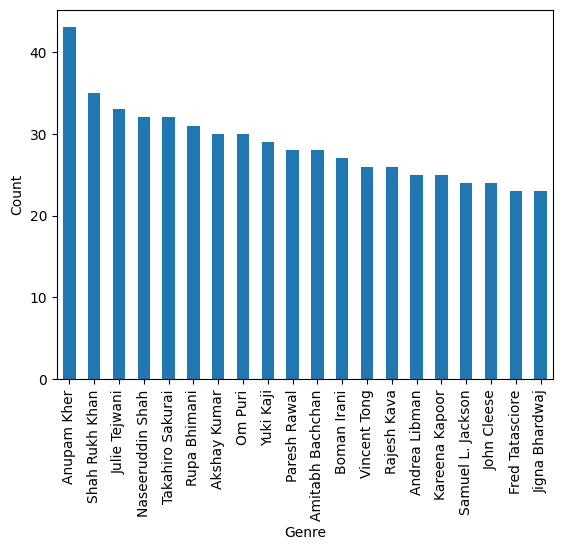

In [214]:
# plotting a Bar Plot for the 10 most popular Cast
clean_result.Cast.value_counts().sort_values(ascending=0)[:20].plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Genre')

#### The top 10 actors who are liked by people and have the most content on the Netflix OTT platform:

Rank|Name|Movie Count|
|-----------|-----------|--------|
1| Anupam Kher|43
2| Shah Rukh Khan|35
3| Julie Tejwani|33
4| Naseeruddin Shah|32
5| Takahiro Sakurai|32
6| Rupa Bhimani|31
7| Akshay Kumar|30
8| Om Puri|30
9| Yuki Kaji|29
10| Paresh Rawal|28

---
### e. Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

In [215]:
# importing the csv file with only the required columns 'Type', 'Cast', 'Release_year'
actors_collaborate = pd.read_csv('asbl_data_analyst_interview_assignment_netflix_csv.csv', usecols = ['Type', 'Cast', 'Release_year'], encoding = 'latin')

In [216]:
# setting the index of a DataFrame directors to the column named 'Type', and then applies a lambda function to split each value in the DataFrame by the , character. 
# The result is stored in a new DataFrame called tmp.
temp_df = actors_collaborate.set_index('Release_year').apply(lambda x: x.str.split(','))

# replacing any null values in the tmp DataFrame with an empty string ''.
result_collaborate_actors = (temp_df.where(temp_df.notnull(), '')
          
          # applying a lambda function to each row of the tmp DataFrame. 
          # The lambda function uses the zip_longest function to combine the values in each row into tuples. 
          # The resulting tuples are then converted to a list.
          .apply(lambda x: list(zip_longest(*x)), axis = 1)
          
          # exploding each list in the DataFrame into separate rows, duplicating the other values in the row as necessary.
          .explode()
          
          # converting each tuple in the DataFrame to a separate Series object.
          .apply(pd.Series)
          
          # setting the column names of the DataFrame to the original column names of the tmp DataFrame.
          .set_axis(temp_df.columns, axis = 1)
          
          # resetting the index of the DataFrame, adding a new column named 'index' to store the original index values of the tmp DataFrame.
          ).reset_index()

# printing the result for debugging
print(result_collaborate_actors)

       Release_year     Type                    Cast
0              2020    Movie                    None
1              2021  TV Show              Ama Qamata
2              2021     None             Khosi Ngema
3              2021     None           Gail Mabalane
4              2021     None          Thabang Molaba
...             ...      ...                     ...
64946          2015     None        Manish Chaudhary
64947          2015     None            Meghna Malik
64948          2015     None           Malkeet Rauni
64949          2015     None          Anita Shabdish
64950          2015     None   Chittaranjan Tripathy

[64951 rows x 3 columns]


In [217]:
# dropping the Rows that do not have an Actor's name
clean_result = result_collaborate_actors.dropna().reset_index() 

# removing the leading spaces introduced while splitting the columns
clean_result['Cast'] = clean_result['Cast'].str.lstrip()

# printing the cleaned dataframe
clean_result

,index,Release_year,Type,Cast
0,1,2021,TV Show,Ama Qamata
1,20,2021,TV Show,Sami Bouajila
2,30,2021,TV Show,Mayur More
3,38,2021,TV Show,Kate Siegel
4,54,2021,Movie,Vanessa Hudgens
...,...,...,...,...
7977,64910,2015,Movie,Ali Suliman
7978,64916,2007,Movie,Mark Ruffalo
7979,64927,2009,Movie,Jesse Eisenberg
7980,64934,2006,Movie,Tim Allen


In [218]:
# only considering the movies that are released after 2010 for finding the popular actors
clean_result_final = clean_result[clean_result['Release_year'] > 2010]

In [219]:
# printing the cleaned dataframe
clean_result_final

,index,Release_year,Type,Cast
0,1,2021,TV Show,Ama Qamata
1,20,2021,TV Show,Sami Bouajila
2,30,2021,TV Show,Mayur More
3,38,2021,TV Show,Kate Siegel
4,54,2021,Movie,Vanessa Hudgens
...,...,...,...,...
7973,64876,2016,TV Show,Michael Johnston
7974,64883,2014,Movie,Adil Hussain
7976,64901,2012,TV Show,Sanam Saeed
7977,64910,2015,Movie,Ali Suliman


In [220]:
# filtering the DataFrame to only include movies or TV shows released on or after 2010
recent_actors = clean_result_final[(clean_result_final["Type"] == "Movie") | (clean_result_final["Type"] == "TV Show")]

# grouping the recent movies by director and count the number of movies for each director
actor_counts = recent_actors.groupby("Cast").size()

# sorting the directors by the number of movies they've directed in descending order
sorted_actors = actor_counts.sort_values(ascending = False)

# printing the top two actors
print("The top two Actors to collaborate more with are:")
print(sorted_actors.head(2).index.tolist())

The top two Actors to collaborate more with are:
['David Attenborough', 'Michela Luci']


#### The top two actors based on the increase in their movies or tv shows over the past years:

Rank|Name|
|-----------|-----------|
1| David Attenborough|
2| Michela Luci|